<a href="https://colab.research.google.com/github/dlawnghks/Self-study/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 22.8 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#형태소 = 언어에서 의미를 가진 최소의 단위

In [3]:
from konlpy.tag import Okt
from collections import Counter

# 분석할 텍스트
text = """
자연어 처리는 컴퓨터 과학과 인공지능의 한 분야로,
컴퓨터가 인간의 언어를 이해하고 해석할 수 있도록 하는 기술입니다.
텍스트 분석, 기계 번역, 감성 분석 등 다양한 응용 분야가 있습니다.
"""

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 명사 단위로 토큰화
tokens = okt.nouns(text)

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("단어 빈도수:")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")


단어 빈도수:
컴퓨터: 2
분야: 2
분석: 2
자연어: 1
처리: 1
과학: 1
인공: 1
지능: 1
인간: 1
언어: 1
이해: 1
해석: 1
수: 1
기술: 1
텍스트: 1
기계: 1
번역: 1
감성: 1
등: 1
응용: 1


In [4]:
from konlpy.tag import Okt
from collections import Counter

# 분석할 텍스트
text = input("분석할 텍스트를 입력하세요: ")

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 명사 단위로 토큰화
tokens = okt.nouns(text)

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("단어 빈도수:")
for word, count in word_counts.most_common():
    print(f"{word}: {count}")


분석할 텍스트를 입력하세요: 안녕하세요 반가워요 배고파요
단어 빈도수:


In [5]:
from konlpy.tag import Okt
from collections import Counter

# 사용자가 입력한 텍스트 받기
text = input("분석할 문장을 입력하세요: ")

# 형태소 분석기 초기화
okt = Okt()

# 텍스트를 형태소 단위로 분석
tokens_with_tags = okt.pos(text)

# 단어와 품사 분리
tokens = [word for word, tag in tokens_with_tags]
tags = {word: tag for word, tag in tokens_with_tags}

# 단어의 빈도수 계산
word_counts = Counter(tokens)

# 결과 출력
print("\n단어 빈도수 및 품사:")
for word, count in word_counts.most_common():
    print(f"{word} ({tags[word]}): {count}번")


분석할 문장을 입력하세요: 안녕하세여

단어 빈도수 및 품사:
안녕하세여 (Adjective): 1번


In [6]:
from konlpy.tag import Okt
from collections import Counter


food_data = {
    "매콤하고 달달하다": "떡볶이",
    "달달하고 부드럽다": "케이크",
    "바삭하고 짭짤하다": "치킨",
    "고소하고 쫄깃하다": "김밥",
    "새콤달콤하다": "탕수육",
}

def predict_food(input_text):
    okt = Okt()
    tokens_with_tags = okt.pos(input_text)

    tokens = [word for word, tag in tokens_with_tags if tag in ["Adjective", "Noun"]]
    print(f"추출된 키워드: {tokens}")

    for features, food in food_data.items():
        feature_tokens = features.split()
        if any(token in feature_tokens for token in tokens):
            return food

    return "알 수 없는 음식"

text = input("음식의 특징을 입력하세요: ")
predicted_food = predict_food(text)
print(f"예측된 음식: {predicted_food}")


음식의 특징을 입력하세요: 매콤하다
추출된 키워드: ['매콤']
예측된 음식: 알 수 없는 음식


데이터 추가 및 성능 개선 필요

In [7]:
!pip install kiwipiepy
from kiwipiepy import Kiwi
kiwi = Kiwi()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 86.0 MB/s eta 0:00:00
  Created wheel for kiwipiepy_model: filename=kiwipiepy_model-0.20.0-py3-none-any.whl size=34818026 sha256=1bbf4a37592b4fa96cd19863acb401bc585385ea6e6dde801a1cca9ea11fdd91
  Stored in directory: /root/.cache/pip/wheels/ca/c8/52/3a539d6e9065b191fe1c215e0203dcc3e00601c0e3d3d39824
Successfully built kiwipiepy_model


In [8]:
text = "이것은 한글 형태소 분석 키위 분석기입니다."
tokens = kiwi.tokenize(text)

In [9]:
nouns = []
for token in kiwi.tokenize(text):
    if 'NN' in token.tag:
        nouns.append(token.form)

키위 형태소 분석기 한글 분석을 위해 공부

In [10]:
!pip install kiwipiepy
from kiwipiepy import Kiwi

In [11]:
kiwi = Kiwi()

text = input("분석할 텍스트를 입력하세요: ")

tokens = kiwi.analyze(text) #형태소를 단위로 나눔
print("\n[1] 형태소 분석 결과:")
for token in tokens[0][0]:
    print(f"{token[0]} ({token[1]})")

stopwords = ['은', '는', '이', '가', '을', '를', '에', '의', '과', '와']  #불용어 제거
filtered_tokens = [token[0] for token in tokens[0][0] if token[0] not in stopwords]
print("\n[2] 불용어 제거 후:")
print(filtered_tokens)

nouns = [token[0] for token in tokens[0][0] if token[1] in ['NNG', 'NNP']]
print("\n[3] 텍스트에서 추출된 명사:")
print(nouns)

unique_words = sorted(set(filtered_tokens))
print("\n[4] 중복 제거된 단어 리스트:")
print(unique_words)

분석할 텍스트를 입력하세요: 안녕하세요 반가워요 자연어처리 공부중입니다

[1] 형태소 분석 결과:
안녕 (NNG)
하 (XSA)
세요 (EF)
반갑 (VA-I)
어요 (EF)
자연어 처리 (NNP)
공부 (NNG)
중 (NNB)
이 (VCP)
ᆸ니다 (EF)

[2] 불용어 제거 후:
['안녕', '하', '세요', '반갑', '어요', '자연어 처리', '공부', '중', 'ᆸ니다']

[3] 텍스트에서 추출된 명사:
['안녕', '자연어 처리', '공부']

[4] 중복 제거된 단어 리스트:
['ᆸ니다', '공부', '반갑', '세요', '안녕', '어요', '자연어 처리', '중', '하']


불용어 제거,키위 형태소로 코드 만들어 공부

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and direc

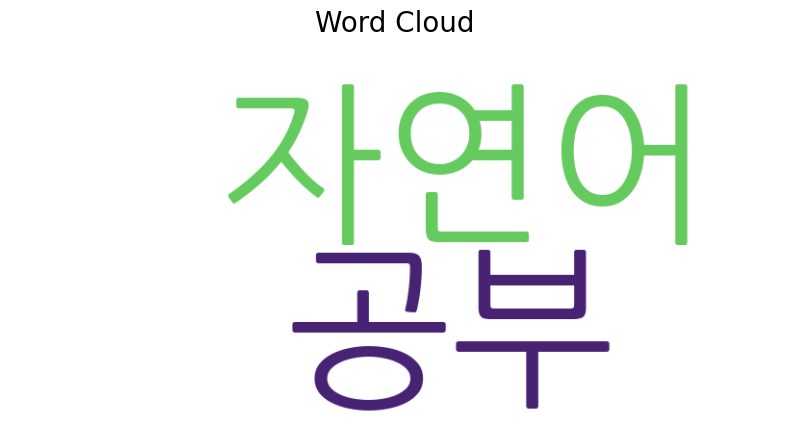

In [12]:
!pip install kiwipiepy wordcloud matplotlib
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

kiwi = Kiwi()

text = input("분석할 텍스트를 입력하세요: ")

#형태소 분석 및 명사 추출
tokens = kiwi.analyze(text)
nouns = [token[0] for token in tokens[0][0] if token[1] in ['NNG', 'NNP']]  # 명사만 추출

# 명사 빈도수 계산
nouns_count = Counter(nouns)

# 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로 설정
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(nouns_count)

#워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.title("Word Cloud", fontsize=20)
plt.show()


한글 워드 클라우드 생성

In [13]:
import numpy as np

In [14]:
a = np.array([1, 2])
b = np.array([2, 2])
c = np.array([-3, -3])

In [15]:
a.shape

(2,)

In [16]:
len(a)

2

In [17]:
np.linalg.norm(a)

2.23606797749979

In [18]:
np.linalg.norm(b-a)
np.linalg.norm(c-a)

6.4031242374328485

In [19]:
import scipy.spatial.distance as dst

In [20]:
dst.cityblock(a,b)

1

In [21]:
np.linalg.norm(c-a,2)

6.4031242374328485

In [22]:
dst.euclidean(a,b)

1.0

In [23]:
d = np.array([1,0,0])
e = np.array([1,1,0])
dst.jaccard(d,e)

0.5

In [24]:
dst.hamming(d,e)

0.3333333333333333

In [25]:
np.dot(a,b)

6

In [26]:
Doc1 = 'banana apple apple eggplant'
Doc2 = 'orange carrot banana eggplant'
Doc3 = 'apple carrot banana banana'
Doc4 = 'orange banana grape'

In [27]:
TEXT = [
    'banana apple apple eggplant'
    'orange carrot banana eggplant'
    'apple carrot banana banana'
    'orange banana grape'
]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
tf_vectorizer = CountVectorizer(min_df=1, max_df=1.0, ngram_range=(1,1))

In [30]:
tf_features = tf_vectorizer.fit_transform(TEXT)

In [31]:
print(tf_features)

  (0, 1)	4
  (0, 0)	2
  (0, 5)	1
  (0, 3)	2
  (0, 4)	1
  (0, 2)	1
  (0, 6)	1


In [32]:
features = tf_features.todense()

In [33]:
features

matrix([[2, 4, 1, 2, 1, 1, 1]])

In [34]:
features_names = tf_vectorizer.get_feature_names_out()

In [35]:
print(features_names)

['apple' 'banana' 'bananaorange' 'carrot' 'eggplantapple' 'eggplantorange'
 'grape']


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf_vectorizer = TfidfVectorizer(min_df=1, max_df=1, ngram_range=(1,1))

In [38]:
tfidf_features = tfidf_vectorizer.fit_transform(TEXT)

In [39]:
print(tfidf_features)

  (0, 1)	0.7559289460184544
  (0, 0)	0.3779644730092272
  (0, 5)	0.1889822365046136
  (0, 3)	0.3779644730092272
  (0, 4)	0.1889822365046136
  (0, 2)	0.1889822365046136
  (0, 6)	0.1889822365046136


In [46]:
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# --- 1. 데이터 준비 ---
# 간단한 예제 데이터: (문장, 의도) 쌍
data = [
    ("안녕하세요, 오늘 기분이 좋아요", "인사"),
    ("예약을 하고 싶어요", "예약"),
    ("안녕, 반갑습니다", "인사"),
    ("내일 3시에 회의 예약해줘", "예약"),
    ("좋은 아침이에요", "인사"),
    ("이번 주 금요일에 레스토랑 예약 부탁해요", "예약")
]

texts, labels = zip(*data)

# --- 2. 텍스트 전처리: KoNLPy의 Okt를 활용한 토큰화 ---
okt = Okt()

def tokenizer(text):
    """
    Okt 형태소 분석기를 활용해 문장을 토큰화합니다.
    (예시에서는 단순히 모든 형태소를 추출)
    """
    return okt.morphs(text)

# --- 3. 의도 인식 모델 구축 ---
# TF-IDF 벡터화와 로지스틱 회귀를 결합한 파이프라인 생성
intent_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer, token_pattern=None)),  # token_pattern=None: 사용자 지정 토크나이저 사용
    ('clf', LogisticRegression())
])

# 모델 학습
intent_pipeline.fit(texts, labels)

# 테스트 문장에 대해 의도 예측
test_text = input("문장을 입력하세요")
predicted_intent = intent_pipeline.predict([test_text])[0]
print("입력 문장:", test_text)
print("예측된 의도:", predicted_intent)

# --- 4. 간단한 엔티티 인식 (NER) ---
def simple_ner(text):
    """
    정규표현식을 이용해 텍스트에서 시간, 요일, 날짜 등의 엔티티를 추출합니다.
    """
    entities = {}

    # 시간 추출 (예: '3시', '10시')
    time_pattern = re.compile(r'(\d{1,2}시)')
    times = time_pattern.findall(text)
    if times:
        entities['시간'] = times

    # 요일 추출 (예: '월요일', '화요일', ...)
    day_pattern = re.compile(r'(월요일|화요일|수요일|목요일|금요일|토요일|일요일)')
    days = day_pattern.findall(text)
    if days:
        entities['요일'] = days

    # 날짜 추출 (예: '5일', '12일')
    date_pattern = re.compile(r'(\d{1,2}일)')
    dates = date_pattern.findall(text)
    if dates:
        entities['날짜'] = dates

    return entities

# 엔티티 인식 테스트
ner_test_text = test_text
entities = simple_ner(ner_test_text)
print("엔티티 인식 결과:", entities)


문장을 입력하세요내일 3시 가능할까요
입력 문장: 내일 3시 가능할까요
예측된 의도: 예약
엔티티 인식 결과: {'시간': ['3시']}


In [50]:
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report

# --- 1. 데이터 준비 ---
# 간단한 예제 데이터: (문장, 의도) 쌍
data = [
    ("안녕하세요, 오늘 기분이 좋아요", "인사"),
    ("예약을 하고 싶어요", "예약"),
    ("안녕, 반갑습니다", "인사"),
    ("내일 3시에 회의 예약해줘", "예약"),
    ("좋은 아침이에요", "인사"),
    ("이번 주 금요일에 레스토랑 예약 부탁해요", "예약")
]
texts, labels = zip(*data)

# --- 2. 텍스트 전처리: 클리닝 및 토큰화 ---
# 2-1. 텍스트 클리닝 함수 (필요시 확장 가능)
def clean_text(text):
    """
    입력된 텍스트에서 양쪽 공백을 제거하고,
    추가로 불필요한 특수문자 제거 등의 작업을 할 수 있습니다.
    """
    text = text.strip()
    # 예시: 한글, 숫자, 공백을 제외한 모든 문자를 제거하려면 아래와 같이 할 수 있습니다.
    # text = re.sub(r'[^\w\s가-힣]', '', text)
    return text

# 2-2. 토큰화 함수: KoNLPy의 Okt를 사용하여 형태소 단위로 분리
okt = Okt()
def tokenizer(text):
    """
    텍스트를 클리닝한 후, Okt 형태소 분석기로 토큰화합니다.
    :param text: 문자열
    :return: 형태소 토큰 리스트
    """
    text = clean_text(text)
    tokens = okt.morphs(text)
    return tokens

# --- 3. 의도 인식 모델 구축 및 평가 ---
# TF-IDF 벡터화와 로지스틱 회귀를 결합한 파이프라인 생성
intent_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizer, token_pattern=None)),  # 사용자 지정 토크나이저 사용
    ('clf', LogisticRegression(max_iter=200))  # max_iter를 늘려 수렴 문제 방지
])

# 3-2. 학습/테스트 셋 분리 후 상세 평가
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.33, random_state=42)
intent_pipeline.fit(X_train, y_train)
y_pred = intent_pipeline.predict(X_test)


# 3-3. 사용자 입력을 통한 예측 (Colab에서 실행 시 입력창이 뜹니다)
test_text = input("\n문장을 입력하세요: ")
predicted_intent = intent_pipeline.predict([test_text])[0]
print("\n입력 문장:", test_text)
print("예측된 의도:", predicted_intent)

# --- 4. 간단한 엔티티 인식 (NER) ---
def simple_ner(text):
    """
    정규표현식을 이용해 텍스트에서 시간, 요일, 날짜, 그리고 연도 등의 엔티티를 추출합니다.
    이 함수는 예시이므로 필요에 따라 더 많은 엔티티 패턴을 추가할 수 있습니다.
    """
    entities = {}

    # 시간 추출 (예: '3시', '10시')
    time_pattern = re.compile(r'(\d{1,2}시)')
    times = time_pattern.findall(text)
    if times:
        entities['시간'] = times

    # 요일 추출 (예: '월요일', '화요일', ...)
    day_pattern = re.compile(r'(월요일|화요일|수요일|목요일|금요일|토요일|일요일)')
    days = day_pattern.findall(text)
    if days:
        entities['요일'] = days

    # 날짜 추출 (예: '5일', '12일')
    date_pattern = re.compile(r'(\d{1,2}일)')
    dates = date_pattern.findall(text)
    if dates:
        entities['날짜'] = dates

    # 추가: 연도 추출 (예: '2023년')
    year_pattern = re.compile(r'(\d{4}년)')
    years = year_pattern.findall(text)
    if years:
        entities['연도'] = years

    return entities

# 4-1. 엔티티 인식: 사용자 입력 문장에 대해 실행
print("\n엔티티 인식 결과 (입력 문장):")
user_entities = simple_ner(test_text)
print("입력 문장에 대한 엔티티:", user_entities)


문장을 입력하세요: 2시에 봐요

입력 문장: 2시에 봐요
예측된 의도: 예약

엔티티 인식 결과 (입력 문장):
입력 문장에 대한 엔티티: {'시간': ['2시']}


In [53]:
!pip install transformers

In [58]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "microsoft/DialoGPT-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def generate_response(input_text, chat_history_ids=None):
    new_input_ids = tokenizer.encode(input_text + tokenizer.eos_token, return_tensors='pt')
    bot_input_ids = new_input_ids if chat_history_ids is None else torch.cat([chat_history_ids, new_input_ids], dim=-1)

    # 샘플링 파라미터를 적용하여 응답 생성
    chat_history_ids = model.generate(
        bot_input_ids,
        max_length=1000,
        do_sample=True,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id
    )

    response = tokenizer.decode(chat_history_ids[:, bot_input_ids.shape[-1]:][0], skip_special_tokens=True)
    return response, chat_history_ids

# 테스트 실행
input_text = input("입력")
response, chat_history_ids = generate_response(input_text)
print("입력:", input_text)
print("생성된 응답:", response)


입력hello
입력: hello
생성된 응답: I like that you used a space in your username.
